In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import cv2

IMG_WIDTH = 50
IMG_HEIGHT = 50
DATA_DIR = 'data'
IMG_SAMPLES_DIR = os.path.join(DATA_DIR, 'samples')
DATA_JOURNAL = os.path.join(DATA_DIR, 'journal.json')


In [14]:
def read_json(file_path: str):
    print(f'Reading journal from {file_path}')
    with open(file_path, 'rb') as file:
        content = file.read()
        content_json = json.loads(content)
        print(f'Read journal from {file_path}')
        return content_json


journal = read_json(DATA_JOURNAL)
print(f'Total length: {len(journal)}')

Reading journal from data\journal.json
Read journal from data\journal.json
Total length: 2500


In [15]:
np.random.shuffle(journal)
all_samples_count = IMG_WIDTH * IMG_HEIGHT
journal = journal[:all_samples_count]
print(f'Shuffled and reduced journal length to {len(journal)}')

Shuffled and reduced journal length to 2500


In [16]:
print(f'Reading {len(journal)} images')
X = []
y = []
for i in range(len(journal)):
    entry = journal[i]
    image = cv2.imread(entry['src'], cv2.IMREAD_UNCHANGED)
    image = np.array(image)
    flat_image = image.flatten().astype(np.float32) / 255.
    X.append(flat_image)
    entry_x = entry['result']['x']
    entry_y = entry['result']['y']
    image_expectancy = np.array([entry_x, entry_y]) / [IMG_WIDTH, IMG_HEIGHT]
    y.append(image_expectancy)
    if not i % 250:
        print(f'Read {i} of {len(journal)} images')

print(f'Read all {len(journal)} images')

test_samples_count = int(all_samples_count * 0.8)
print(len(X))
X_train = np.array(X[:test_samples_count])
X_test = np.array(X[test_samples_count:])

y_train = np.array(y[:test_samples_count])
y_test = np.array(y[test_samples_count:])

X = []
y = []

print(f'Train samples: {len(X_train)}')
print(f'Test samples: {len(X_test)}')



Reading 2500 images
Read 0 of 2500 images
Read 250 of 2500 images
Read 500 of 2500 images
Read 750 of 2500 images
Read 1000 of 2500 images
Read 1250 of 2500 images
Read 1500 of 2500 images
Read 1750 of 2500 images
Read 2000 of 2500 images
Read 2250 of 2500 images
Read all 2500 images
2500
Train samples: 2000
Test samples: 500


In [17]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(X_train[0].shape[0], activation='relu', name='layer1'),
    keras.layers.Dense(2500, activation='relu', name='layer2'),
    keras.layers.Dense(5000, activation='relu', name='layer4'),
    keras.layers.Dense(2),
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=[keras.metrics.MeanSquaredError(),
                       keras.metrics.AUC(),]
              )


Epoch 1/3
63/63 [==============================] - 15s 220ms/step - loss: 54.6991 - mean_squared_error: 54.6991 - auc: 0.5060 - val_loss: 0.1159 - val_mean_squared_error: 0.1159 - val_auc: 0.4392
Epoch 2/3
63/63 [==============================] - 13s 200ms/step - loss: 0.1022 - mean_squared_error: 0.1022 - auc: 0.4995 - val_loss: 0.0846 - val_mean_squared_error: 0.0846 - val_auc: 0.4369
Epoch 3/3
63/63 [==============================] - 13s 204ms/step - loss: 0.0990 - mean_squared_error: 0.0990 - auc: 0.4777 - val_loss: 0.0999 - val_mean_squared_error: 0.0999 - val_auc: 0.4177


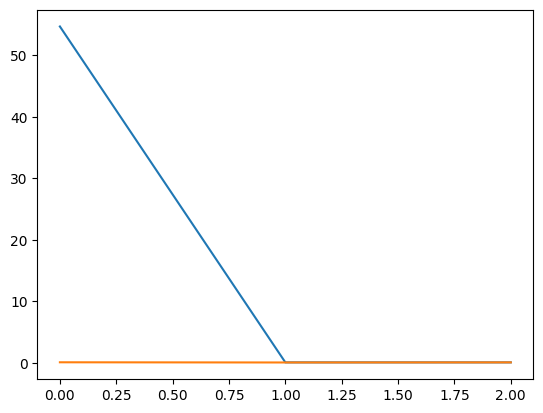

In [19]:
# model.predict(X_train[:1])
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_test, y_test))

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [25]:
print(model.predict(X_test[:1])*[IMG_WIDTH, IMG_HEIGHT])
print(y_test[:1]*[IMG_WIDTH, IMG_HEIGHT])


1/1 [==============================] - 0s 23ms/step
[[17.91302264 31.22326136]]
[[24. 42.]]


In [21]:
arr = np.array([[1,2], [3,4]])
arr * [2,3]


array([[ 2,  6],
       [ 6, 12]])